In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
df = pd.read_csv("C:/Users/Misiek/Downloads/autos.csv/autos.csv", sep = ",", header =0, encoding="cp1252") #import bazy danych z pliku
df.sample(10)#sprawdzenie czy baza została poprawnie zaimportowana

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
48773,2016-03-11 11:38:31,Hyunday_Getz_Klima_Benziner_5_Tueren,privat,Angebot,880,control,kleinwagen,2004,NaN,0,getz,150000,1,benzin,hyundai,ja,2016-03-11 00:00:00,0,59557,2016-03-23 03:19:08
94214,2016-03-27 21:37:39,BMW_M4_Coupe,privat,Angebot,65000,test,coupe,2014,manuell,431,m_reihe,30000,10,benzin,bmw,nein,2016-03-27 00:00:00,0,20097,2016-04-05 21:45:52
105410,2016-03-30 17:37:54,Zum_aufruesten,privat,Angebot,150,control,kombi,1997,manuell,90,mondeo,150000,9,benzin,ford,NaN,2016-03-30 00:00:00,0,67346,2016-04-01 11:46:44
310237,2016-03-26 12:50:59,BMW_316ti_compact,privat,Angebot,3400,control,limousine,2004,manuell,116,3er,150000,12,benzin,bmw,nein,2016-03-26 00:00:00,0,76228,2016-04-06 00:44:57
59956,2016-04-02 17:49:15,Alfa_Romeo_147_1.6_Twin_Spark_/Sehr_gepflegt/_...,privat,Angebot,2149,control,kleinwagen,2002,manuell,105,147,150000,9,benzin,alfa_romeo,NaN,2016-04-02 00:00:00,0,45127,2016-04-06 17:17:41
294623,2016-04-03 11:52:10,Renault_Twingo_1.2_Soleil,privat,Angebot,1550,control,kleinwagen,2002,manuell,58,twingo,125000,6,benzin,renault,nein,2016-04-03 00:00:00,0,71636,2016-04-03 11:52:10
272476,2016-03-17 14:48:55,Opel_Corsa_1.2_16V_Cosmo,privat,Angebot,2370,control,kleinwagen,2004,automatik,75,corsa,90000,3,benzin,opel,nein,2016-03-17 00:00:00,0,13089,2016-03-24 08:45:43
8072,2016-03-28 14:57:39,Verkaufe_mein_opel_meriva_baujahr_2004,privat,Angebot,1280,test,kleinwagen,2004,manuell,107,meriva,150000,6,benzin,opel,NaN,2016-03-28 00:00:00,0,34582,2016-04-06 19:16:37
126465,2016-03-22 15:48:10,MINI_Mini_One_Seven__Klimaautomatik__8_fach_be...,privat,Angebot,5950,control,kleinwagen,2005,manuell,90,one,80000,11,benzin,mini,nein,2016-03-22 00:00:00,0,64823,2016-04-06 05:44:47
38300,2016-03-31 10:52:30,Focus_Rs__mk_2,privat,Angebot,25500,control,NaN,2009,manuell,305,NaN,70000,10,NaN,ford,nein,2016-03-31 00:00:00,0,72501,2016-03-31 11:41:49


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)#usuwanie niepotrzebnych danych

In [6]:
df.sample(10)# sprawdzenie czy sie usunelo
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

In [7]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

In [8]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

In [9]:
dedups.isnull().sum()


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


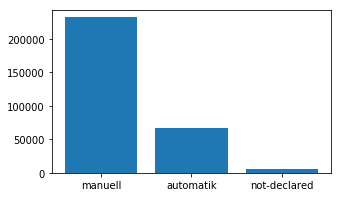

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


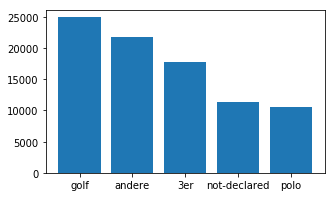

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


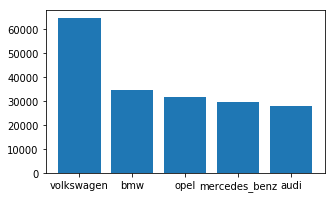

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


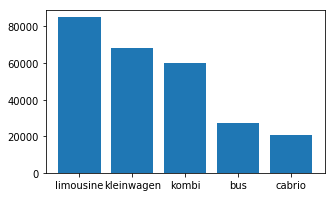

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


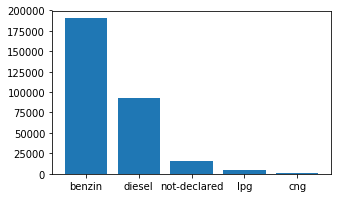

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


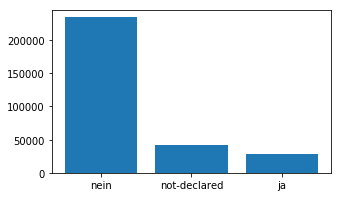

In [10]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

C:\Users\Misiek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


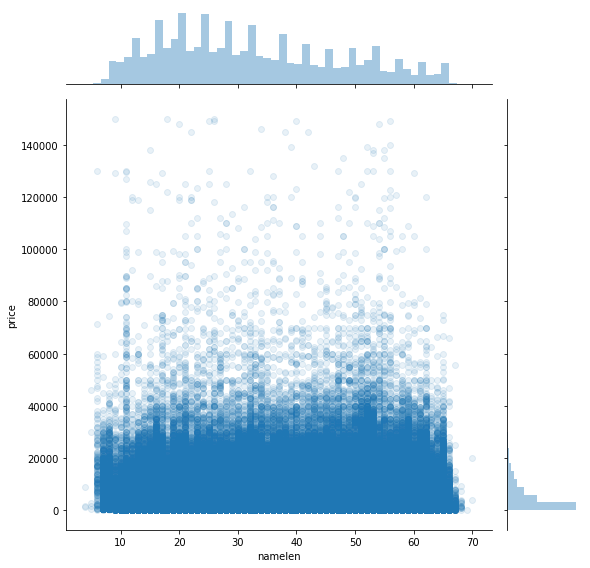

In [11]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    height=8)

In [12]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

In [13]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])

0.6224184813880769

In [14]:
labeled.is_copy = False
labeled.drop(['name_feat'], axis='columns', inplace=True)

C:\Users\Misiek\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Misiek\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196
brand_feat,-0.105694,-0.044526,-0.310254,-0.026645,-0.012156,0.100056,0.125735,0.016474,0.472098,1.000000,-0.023840,-0.102601


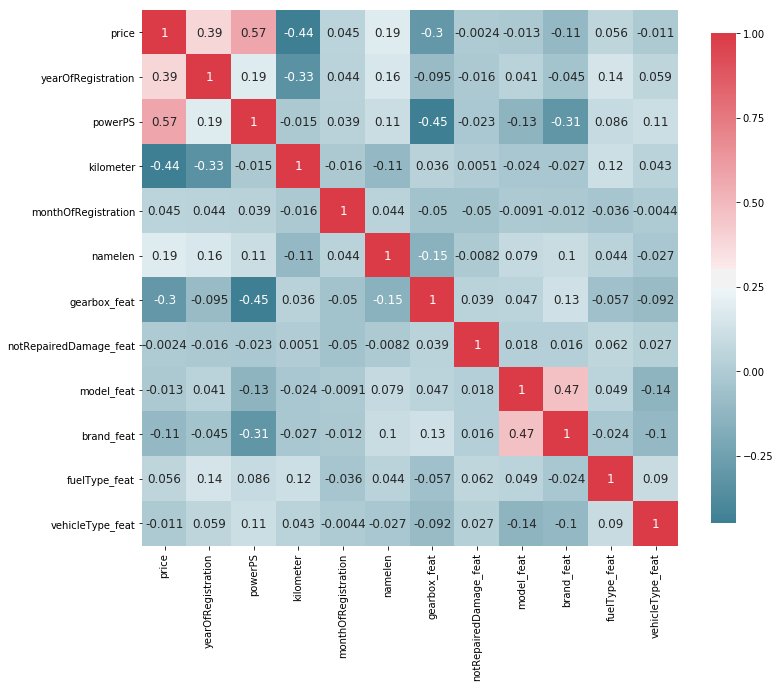

In [16]:
plot_correlation_map(labeled)
labeled.corr()

In [17]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

NameError: name 'locate' is not defined